In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import time

In [11]:
def greedy_coloring(graph):
    colors = {}  # Düğümlerin renklerini tutacak sözlük
    colored_nodes = set()  # Renklendirilmiş düğümleri tutacak küme

    for node in sorted(graph.keys()):  # Düğümleri sıralayarak iterasyon yap
        neighbors_colors = set()  # Komşu düğümlerin renklerini tutacak küme
        for neighbor in graph[node]:  # Düğümün komşularını dön
            if neighbor in colored_nodes:  # Eğer komşu renklendirilmişse
                neighbors_colors.add(colors[neighbor])  # Rengini neighbors_colors kümesine ekle

        # Mümkün olan en küçük renk numarasını bul
        for color in range(len(graph)):
            if color not in neighbors_colors:  # Eğer bu renk komşu renkler arasında yoksa
                colors[node] = color  # Düğüme bu rengi ata
                break

        colored_nodes.add(node)  # Düğümü renklendirilmiş düğümler kümesine ekle

    return colors

def read_graph_from_file(file_path):
    graph = {}
    with open(file_path, 'r') as file:
        v, e = map(int, file.readline().split())
        for _ in range(e):
            v1, v2 = map(int, file.readline().split())
            if v1 not in graph:
                graph[v1] = []
            if v2 not in graph:
                graph[v2] = []
            graph[v1].append(v2)
            graph[v2].append(v1)
    return graph


In [12]:
def measure_execution_time(file_path):
    graph = read_graph_from_file(file_path)
    start_time = time.time()
    colors = greedy_coloring(graph)
    end_time = time.time()
    execution_time = end_time - start_time
    return len(graph), execution_time

In [13]:
file_path = "Data/gc_1000_9"  # Veri dosyasının yolu
graph = read_graph_from_file(file_path)  # Dosyadan grafi oku
colors = greedy_coloring(graph)  # Greedy algoritması ile renklendir

print("Düğüm Renkleri:")
for node, color in colors.items():
    print(f"Düğüm {node}: Renk {color}")
        

Düğüm Renkleri:
Düğüm 0: Renk 0
Düğüm 1: Renk 1
Düğüm 2: Renk 2
Düğüm 3: Renk 3
Düğüm 4: Renk 0
Düğüm 5: Renk 4
Düğüm 6: Renk 5
Düğüm 7: Renk 6
Düğüm 8: Renk 2
Düğüm 9: Renk 7
Düğüm 10: Renk 8
Düğüm 11: Renk 3
Düğüm 12: Renk 9
Düğüm 13: Renk 5
Düğüm 14: Renk 10
Düğüm 15: Renk 11
Düğüm 16: Renk 12
Düğüm 17: Renk 2
Düğüm 18: Renk 13
Düğüm 19: Renk 4
Düğüm 20: Renk 14
Düğüm 21: Renk 6
Düğüm 22: Renk 8
Düğüm 23: Renk 11
Düğüm 24: Renk 15
Düğüm 25: Renk 12
Düğüm 26: Renk 15
Düğüm 27: Renk 9
Düğüm 28: Renk 5
Düğüm 29: Renk 13
Düğüm 30: Renk 10
Düğüm 31: Renk 16
Düğüm 32: Renk 16
Düğüm 33: Renk 1
Düğüm 34: Renk 17
Düğüm 35: Renk 18
Düğüm 36: Renk 19
Düğüm 37: Renk 20
Düğüm 38: Renk 21
Düğüm 39: Renk 17
Düğüm 40: Renk 3
Düğüm 41: Renk 7
Düğüm 42: Renk 22
Düğüm 43: Renk 23
Düğüm 44: Renk 24
Düğüm 45: Renk 21
Düğüm 46: Renk 25
Düğüm 47: Renk 26
Düğüm 48: Renk 27
Düğüm 49: Renk 19
Düğüm 50: Renk 8
Düğüm 51: Renk 4
Düğüm 52: Renk 23
Düğüm 53: Renk 28
Düğüm 54: Renk 24
Düğüm 55: Renk 20
Düğüm 56: R

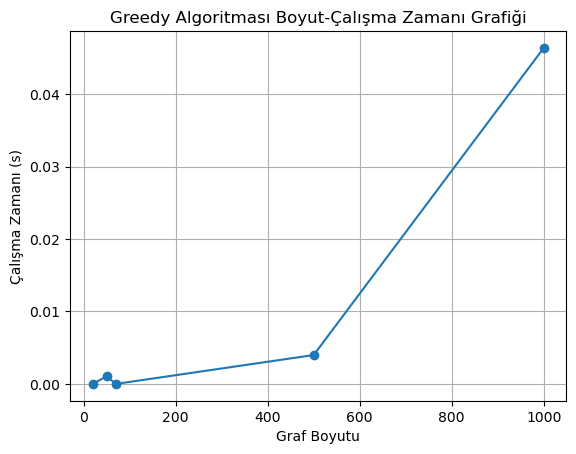

In [16]:
# Dosya yolları ve boyutları
file_paths = ["Data/gc_20_1", "Data/gc_50_7", "Data/gc_70_1", "Data/gc_500_3", "Data/gc_1000_9"]
graph_sizes = []
execution_times = []  # Burada çalışma sürelerini saklayacağız

# Boyut-Çalışma zamanı ölçümleri
for file_path in file_paths:
    graph_size, execution_time = measure_execution_time(file_path)
    graph_sizes.append(graph_size)
    execution_times.append(execution_time)  # Çalışma süresini listeye ekliyoruz

# Grafiği çizme
plt.plot(graph_sizes, execution_times, marker='o')
plt.title('Greedy Algoritması Boyut-Çalışma Zamanı Grafiği')
plt.xlabel('Graf Boyutu')
plt.ylabel('Çalışma Zamanı (s)')
plt.grid(True)
plt.show()